<a href="https://colab.research.google.com/github/MateuszPasternak/PythonForML_AGH/blob/main/DataPrepForRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Python_for_ML/stackoverflow_full.csv')

In [130]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
from sklearn.preprocessing import (
  MinMaxScaler,
  StandardScaler,
)

Categorical Values

In [100]:
df_numerical = data.select_dtypes("number")
df_categorical = data.select_dtypes("object")

In [101]:
df_categorical["Age"] = df_categorical["Age"].replace({"<35": 1, ">35": 0})
df_numerical["Age"] = df_categorical[["Age"]]

In [102]:
df_categorical["MentalHealth"] = df_categorical["MentalHealth"].replace({"No": 0, "Yes": 1})
df_numerical["MentalHealth"] = df_categorical[["MentalHealth"]]

In [103]:
df3 = df_categorical.copy()

df_num = pd.get_dummies(df3,
                     columns = ['EdLevel'])
df_num = pd.get_dummies(df_num,
                     columns = ['Gender'])
df_num = pd.get_dummies(df_num,
                     columns = ['Accessibility'])

#display(df3)
df_num.head()

,Age,MentalHealth,MainBranch,Country,HaveWorkedWith,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,Dev,Sweden,C++;Python;Git;PostgreSQL,1,0,0,0,0,1,0,0,1,0
1,1,0,Dev,Spain,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,0,0,0,0,1,1,0,0,1,0
2,1,0,Dev,Germany,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,1,0,0,0,0,1,0,0,1,0
3,1,0,Dev,Canada,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,0,0,0,0,1,1,0,0,1,0
4,0,0,NotDev,Singapore,C++;Python,0,0,0,1,0,1,0,0,1,0


In [104]:
df_num.drop(['MainBranch', 'Country', 'HaveWorkedWith'], axis=1)

,Age,MentalHealth,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,1,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,1,1,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,1,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,0,0,0,0,1,1,0,0,1,0
73458,0,0,0,0,0,0,1,1,0,0,1,0
73459,1,0,0,0,0,0,1,1,0,0,1,0
73460,1,1,0,0,0,0,1,1,0,0,0,1


In [106]:
for i in df_num:
  df_numerical[i] = df_num[i]

In [107]:
data = df_numerical
data.head()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,Age,MentalHealth,MainBranch,...,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
0,0,1,7,4,51552.0,4,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
1,1,1,12,5,46482.0,12,1,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
2,2,1,15,6,77290.0,7,0,1,0,Dev,...,1,0,0,0,0,1,0,0,1,0
3,3,1,9,6,46135.0,13,0,1,0,Dev,...,0,0,0,0,1,1,0,0,1,0
4,4,0,40,30,160932.0,2,0,0,0,NotDev,...,0,0,0,1,0,1,0,0,1,0


Data split (testing, training)

In [121]:
data = data.dropna()

In [123]:
data = data.drop_duplicates()

In [175]:
from sklearn.model_selection import train_test_split

#Unnamed: 0 	Age 	Accessibility 	EdLevel 	Employment 	Gender 	MentalHealth 	MainBranch 	YearsCode
#YearsCodePro 	Country 	PreviousSalary 	HaveWorkedWith 	ComputerSkills 	Employed

X = data.drop(['Unnamed: 0', 'Employment', 'Country', 'HaveWorkedWith',
               'MainBranch', 'MentalHealth','ComputerSkills', 'Employed'], axis = 1)
y = data['MentalHealth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.75, random_state=1)

X_train.head()

,YearsCode,YearsCodePro,PreviousSalary,Age,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
24351,20,11,84000.0,0,0,0,1,0,0,1,0,0,1,0
18019,9,6,58167.0,1,0,0,0,0,1,1,0,0,1,0
53463,20,16,51189.0,0,0,0,1,0,0,1,0,0,1,0
62711,11,5,31993.0,1,0,0,0,0,1,1,0,0,1,0
40539,8,2,1692.0,1,0,0,0,0,1,1,0,0,1,0


Data operation on train set

<Axes: >

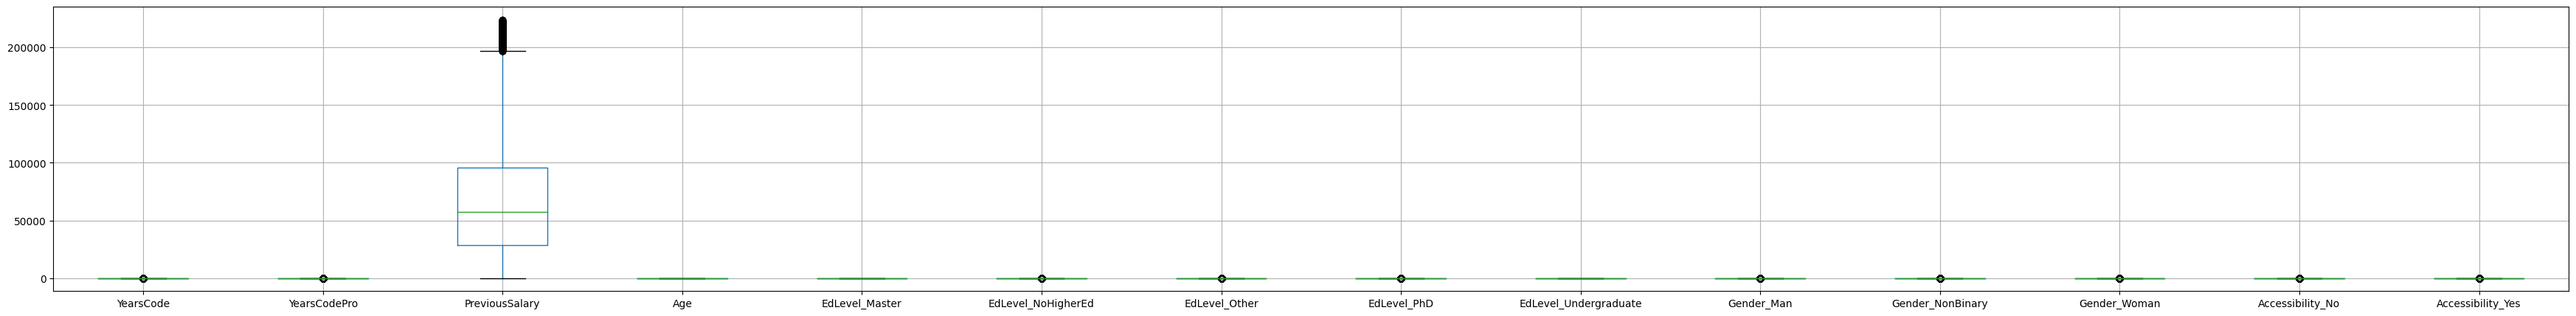

In [129]:
plt.figure(figsize=(44, 5))
X_train.boxplot()

Normalizing data

In [148]:
#for i in X_train.index:
#  if(X_train['YearsCodePro'][i] > X_train['YearsCode'][i]):
#    X_train.drop([i])

In [176]:
dataX_2 = X_train[X_train['YearsCodePro'] <= X_train['YearsCode']]
#dataX_3 = X_train[~dataX_2]

In [177]:
display(dataX_2)
X_train_old = X_train
X_train = dataX_2

,YearsCode,YearsCodePro,PreviousSalary,Age,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,Gender_Man,Gender_NonBinary,Gender_Woman,Accessibility_No,Accessibility_Yes
24351,20,11,84000.0,0,0,0,1,0,0,1,0,0,1,0
18019,9,6,58167.0,1,0,0,0,0,1,1,0,0,1,0
53463,20,16,51189.0,0,0,0,1,0,0,1,0,0,1,0
62711,11,5,31993.0,1,0,0,0,0,1,1,0,0,1,0
40539,8,2,1692.0,1,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20628,5,1,2724.0,1,0,0,0,0,1,1,0,0,1,0
21460,5,3,75936.0,1,0,1,0,0,0,1,0,0,1,0
73412,23,15,93516.0,0,1,0,0,0,0,1,0,0,1,0
50100,16,16,17448.0,1,0,0,0,1,0,1,0,0,1,0


In [178]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
dataTrain_normalized = minmax_scaler.fit_transform(X_train)
dataTrain_normalized_old = minmax_scaler.fit_transform(X_train_old)

<Axes: >

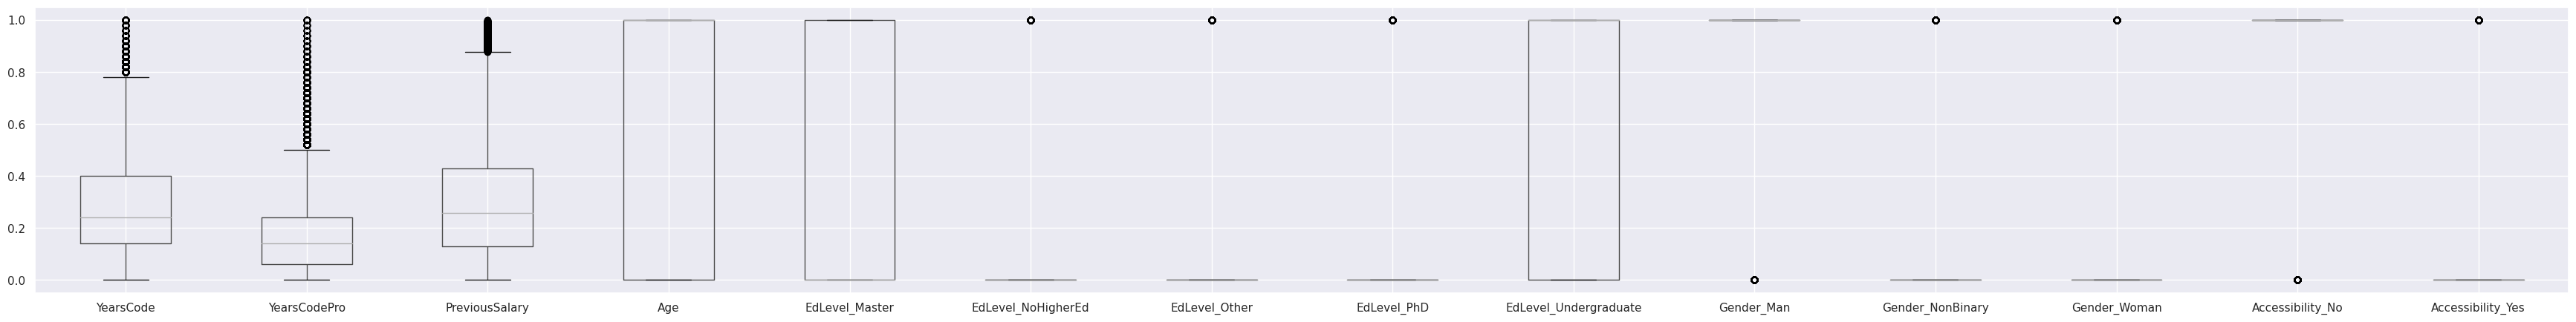

In [151]:
plt.figure(figsize=(44, 5))
dataTrain_normalized.boxplot()

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

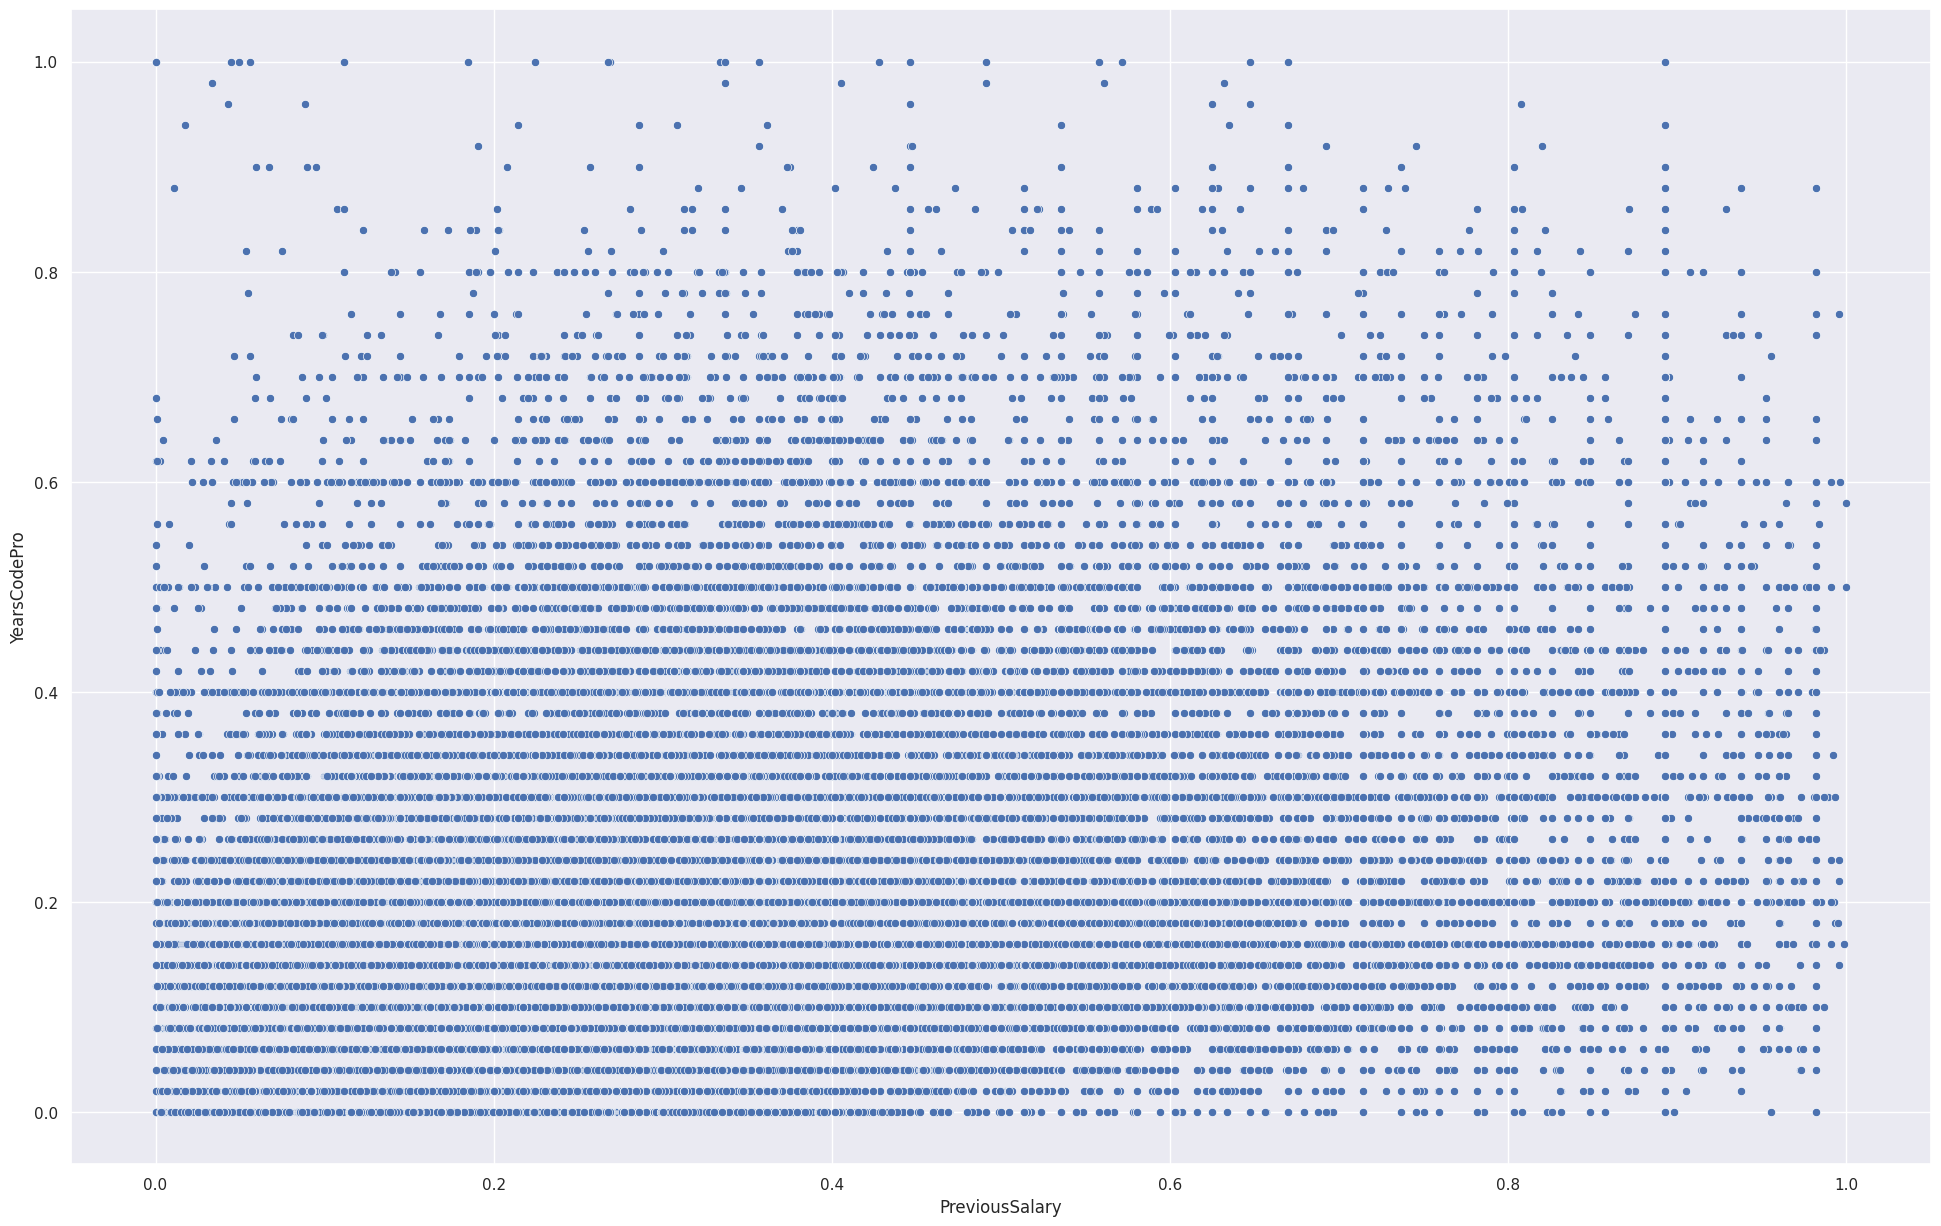

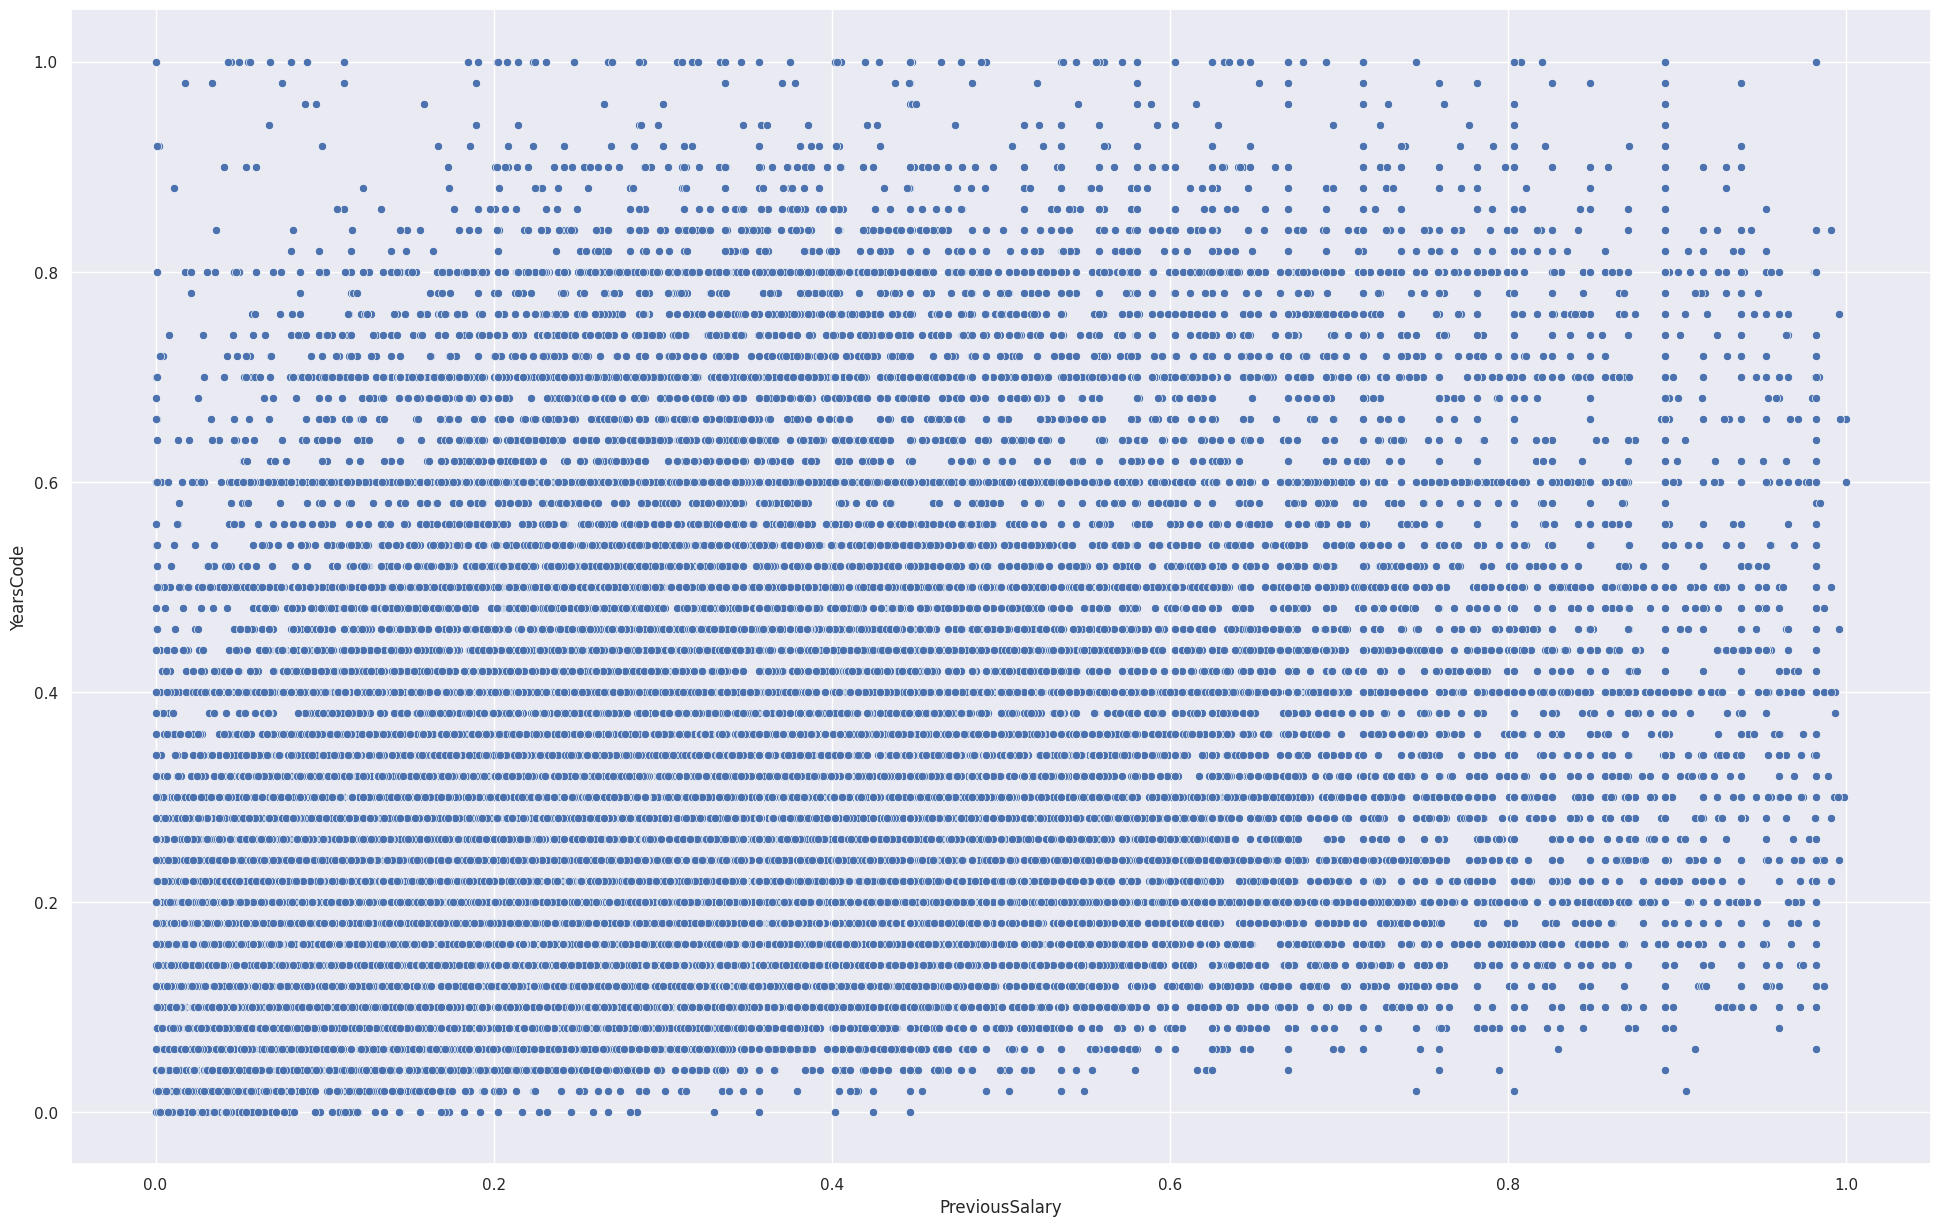

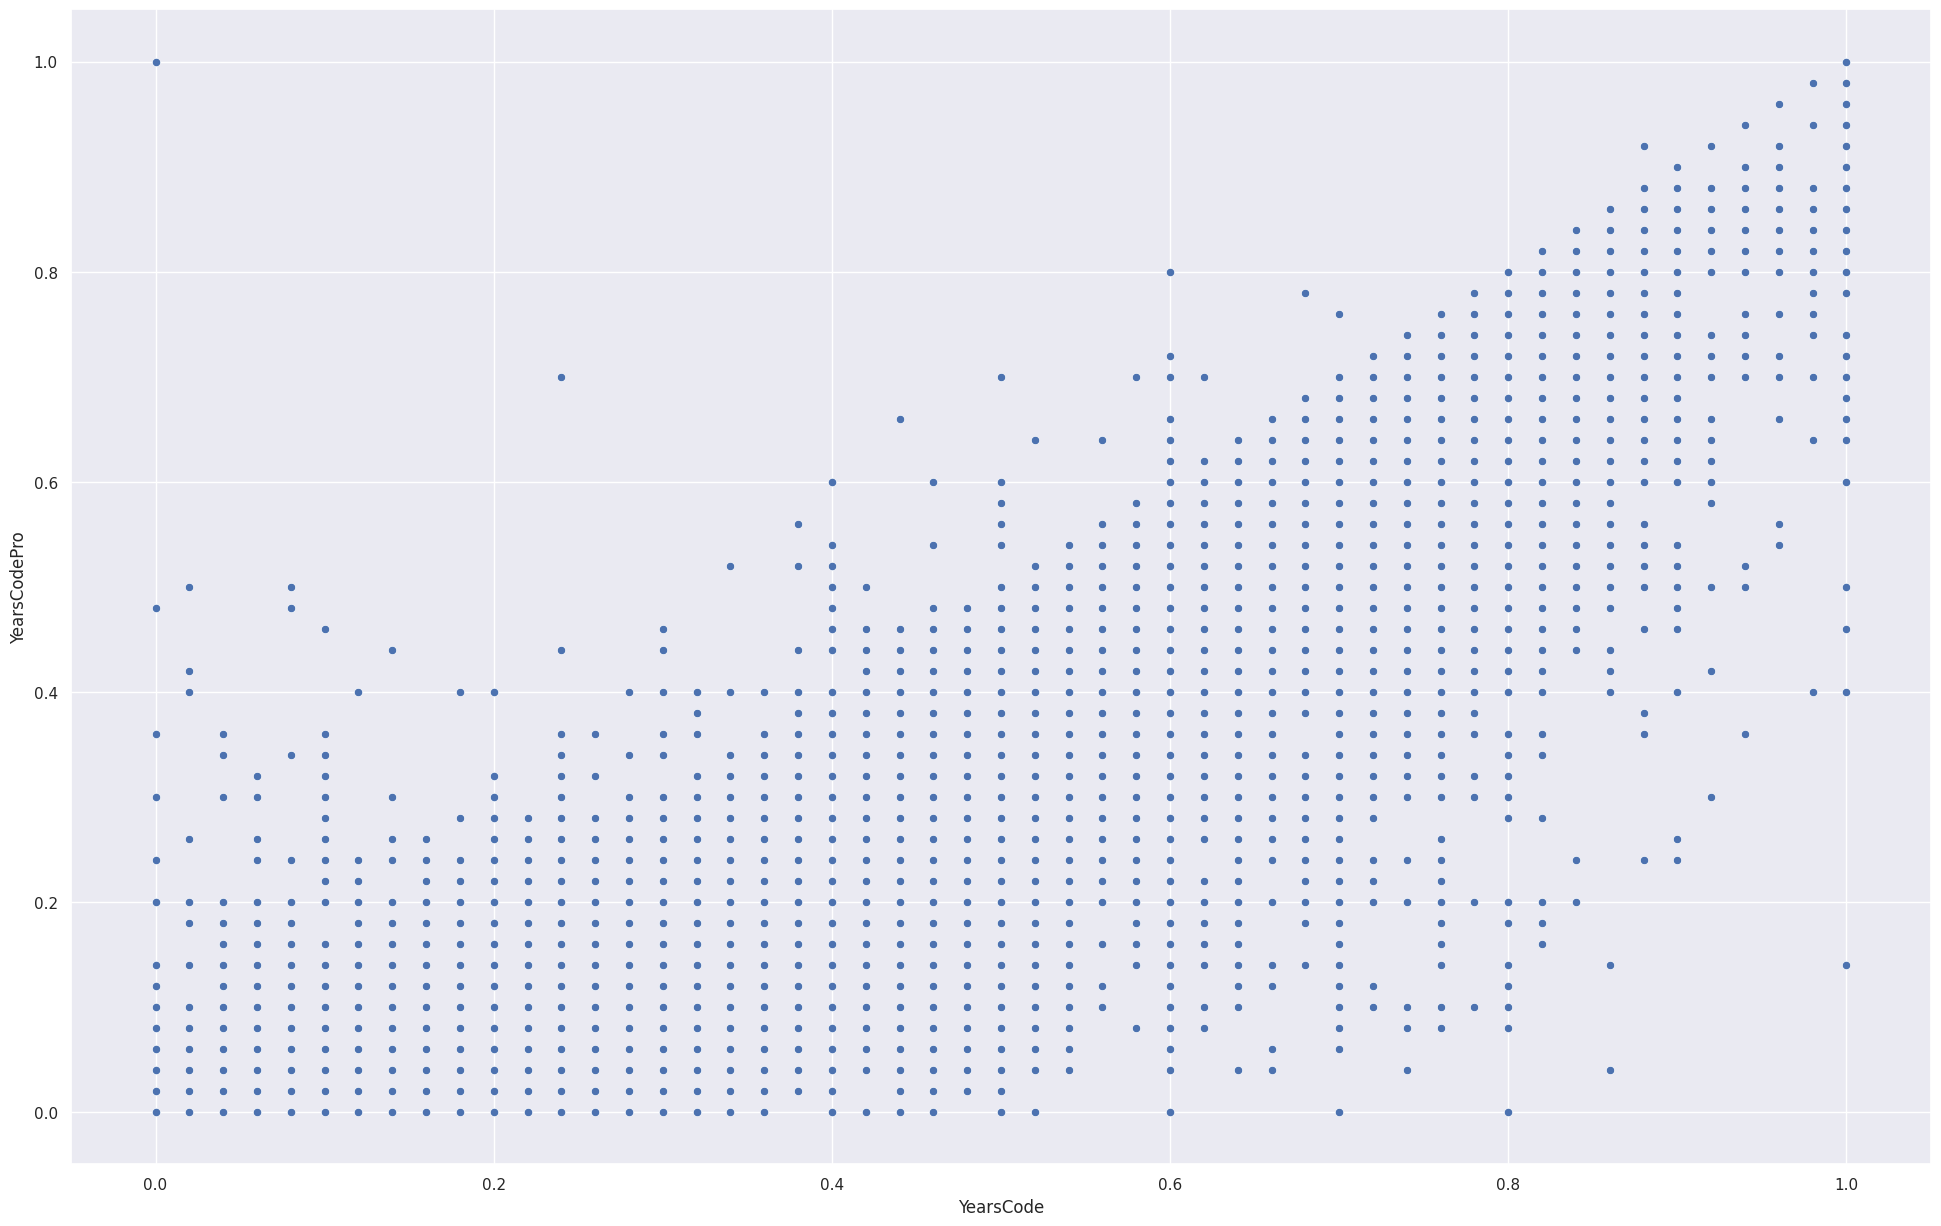

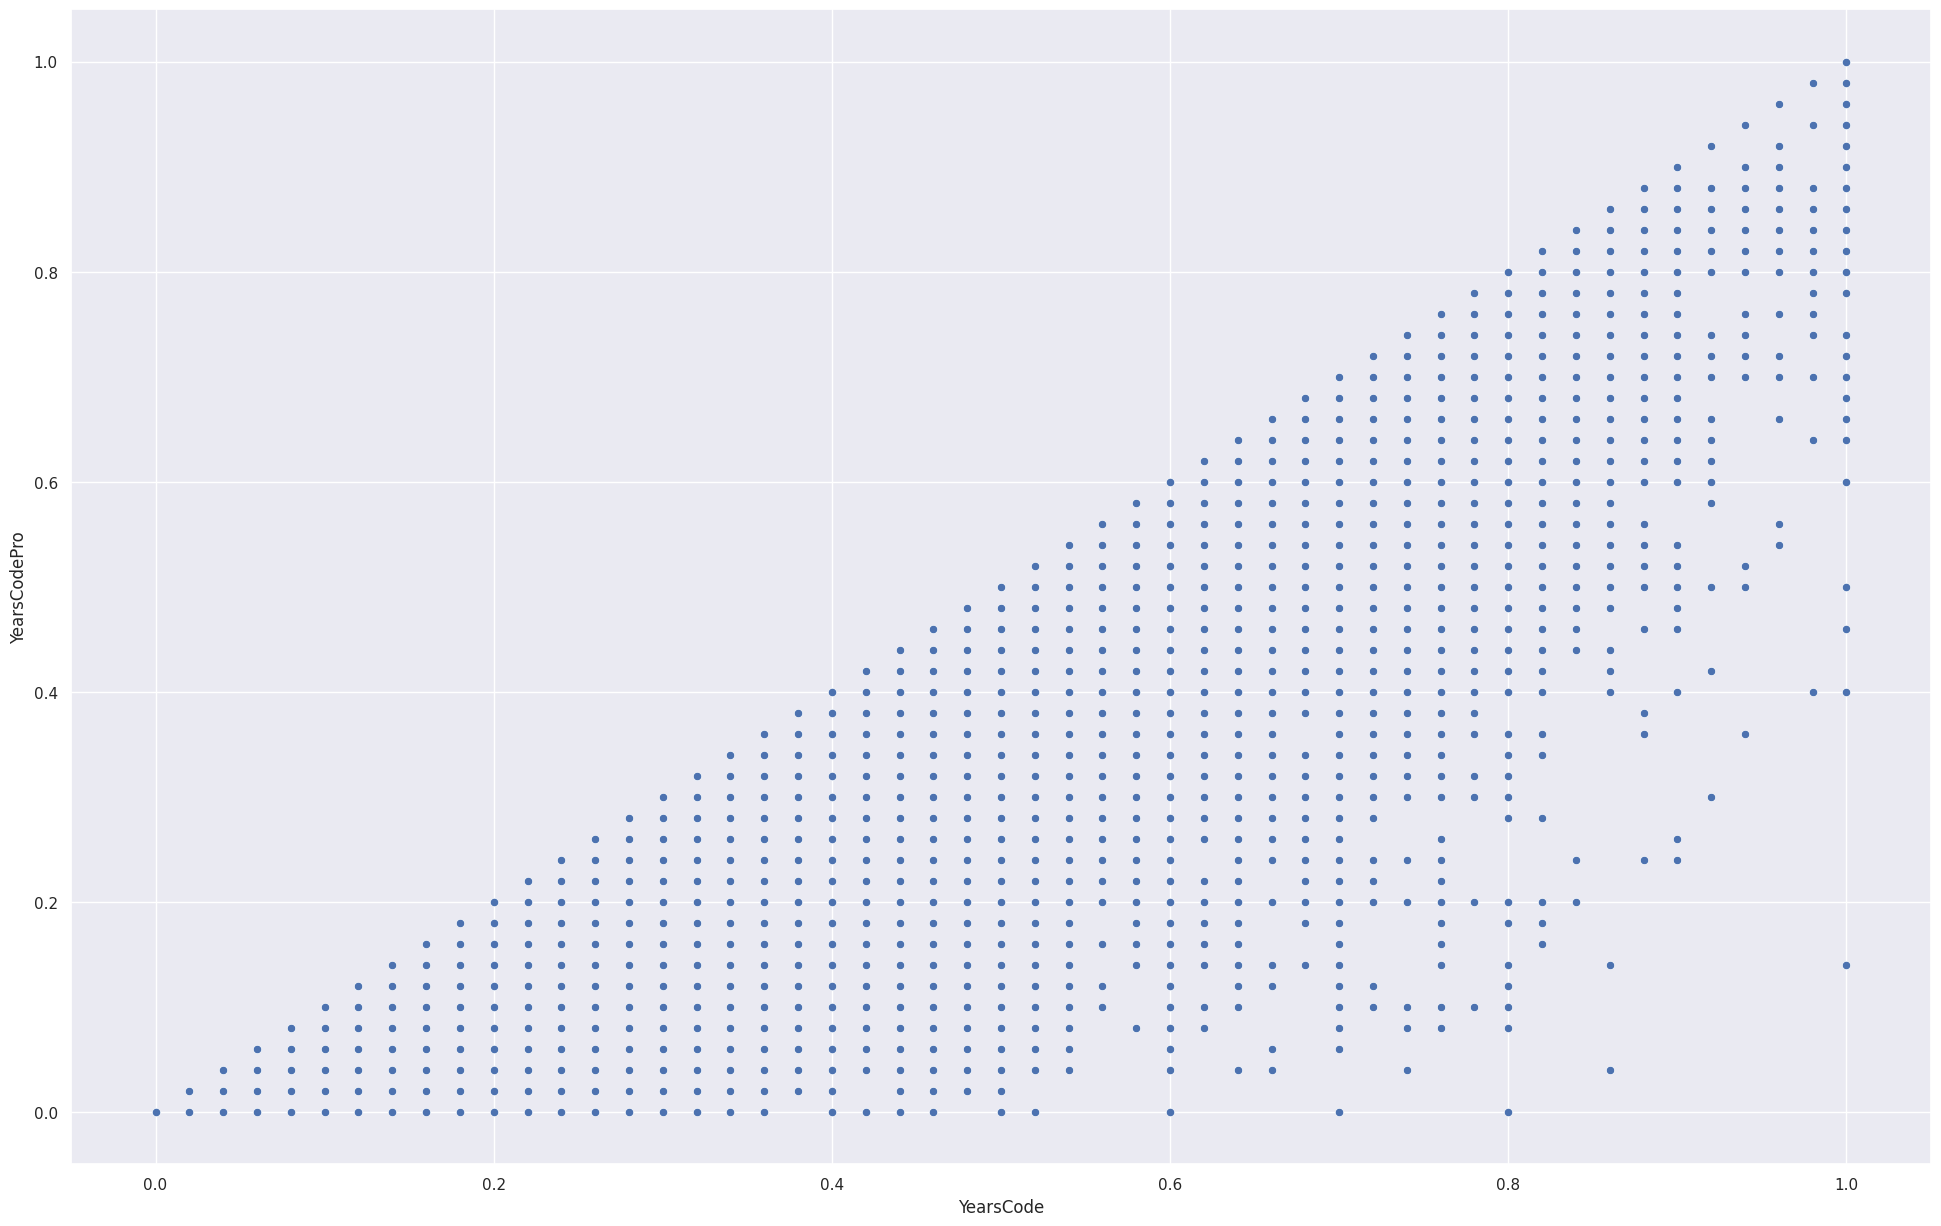

In [179]:
sns.set_theme()

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='PreviousSalary', y='YearsCode')

plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized_old, x='YearsCode', y='YearsCodePro')
plt.figure(figsize=(24, 15))
sns.scatterplot(dataTrain_normalized, x='YearsCode', y='YearsCodePro')

in report describe why have you cut data above line above